In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file='/Users/alexandergandji/Desktop/Course_Folder/Case Study/Hypothesis Test/Mobile Games/cookie_cats.csv'
df=pd.read_csv(file)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Intro

In this project, a gaming company wants to gain a better understanding of its users behaviour's.

We will analyse data from a mobile game called "Cookie Cat". In this game, users previously encountered a gate, forcing them to wait some time before they can progress or make an in-app purchase to continue immediately. Currently, this gate will appear when the user reaches level/gate 30. The company wants to know if the gaming behaviour of its customers changes when the gate is moved from level 30 to level 40.

This will be done with an A/B test/hypothesis test.

# Data Cleaning

In [3]:
df.shape

(90189, 5)

We have a data set with 5 columns and 90189.

The next step is to check for any missing values.

In [4]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


We do not have any null-values which is really good. Next, we get familar with the data set.

In [6]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

Here we can see that we do not have any duplicates in the "userid" column, we have a data set with 90189 rows, and we do have 90189 unique user IDs.

As already stated, we will be doing an A/B Test, specifically an Independent t-test, to determine if the change from putting the gate from level 30 to level 40 will lead to a statistically significant difference.
Why an Independent t-test? We analyse the same variable in independent groups (control and test group). In our case, the sum of played rounds of each user.
We need to determine a test and control group to do the test.

Control Group: Here, we will be using gate_30 because this has been the standard until now

Test Group: gate_40. This will be the test group. Does the switch from level 30 to level 40 lead to a statistically significant difference?

To make this easier to understand, we will rename the values in the column "version".

In [7]:
df['version']=df.version.replace({'gate_30':'control', 'gate_40':'test'})
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,control,3,False,False
1,337,control,38,True,False
2,377,test,165,True,False
3,483,test,1,False,False
4,488,test,179,True,True


# Exploratory Analysis

In [8]:
print('number of rows', len(df.sum_gamerounds))
print((df.sum_gamerounds.value_counts().sort_values(ascending=False)/len(df.sum_gamerounds))*100)

number of rows 90189
1      6.140438
2      5.107053
0      4.428478
3      4.388562
4      4.023772
         ...   
821    0.001109
659    0.001109
634    0.001109
741    0.001109
708    0.001109
Name: sum_gamerounds, Length: 942, dtype: float64


Next, we want to see if we have relativly equally sized samples.

test       45489
control    44700
Name: version, dtype: int64


Text(0, 0.5, '')

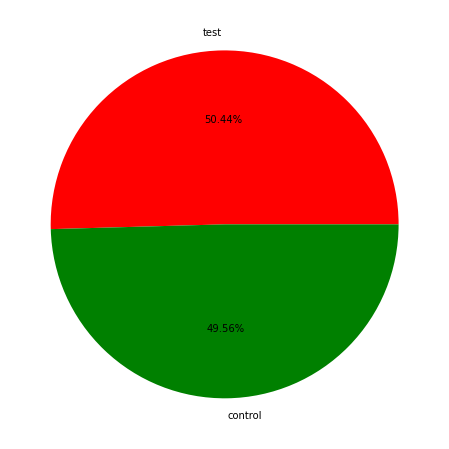

In [9]:
import matplotlib.pyplot as plt
print(df.version.value_counts())
df.version.value_counts().plot(kind='pie', figsize=(8,8), autopct='%.02f%%', colors=['red', 'green'])
plt.ylabel('')

As we can see, both samples are very much the same. Being very strict, we must mention that the control group is by a fraction smaller than the control group.

Next, we want to see how many rounds each group plays (control and test).

version
control    2344795
test       2333530
Name: sum_gamerounds, dtype: int64


Text(0.5, 1.0, 'Total of rounds played by the different groups')

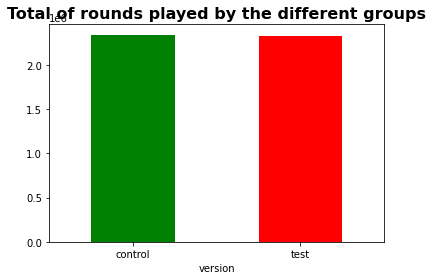

In [10]:
print(df.groupby('version')['sum_gamerounds'].sum())
df.groupby('version')['sum_gamerounds'].sum().plot(kind='bar', color=['green', 'red'])
plt.xticks(rotation=0)
plt.title('Total of rounds played by the different groups', size=16, fontweight='bold')

As we can see, we have almost the same amount of rounds played between the different groups.

Next, we want to understand the column "retention_1".

In [11]:
df.groupby(['retention_1', 'version'])['sum_gamerounds'].count().reset_index()

,retention_1,version,sum_gamerounds
0,False,control,24666
1,False,test,25370
2,True,control,20034
3,True,test,20119


The "retention_1" column shows if a user has returned and played a round one day after the game's installation.

- True=> they came back one day after the installation and played a round

- False=> they did not come back one day after the installation and played a round

Again, we need to see a difference between the different groups.

Text(0.5, 0, 'test group')

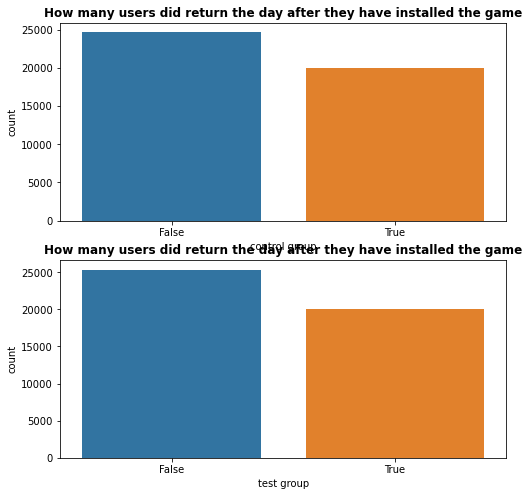

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
axt=df[(df.version=='control')]['retention_1']
sns.countplot(axt)
plt.title('How many users did return the day after they have installed the game', size=12, fontweight='bold')
plt.xlabel('control group')



plt.subplot(2,1,2)
axc=df[(df.version=='test')]['retention_1']
sns.countplot(axc)
plt.title('How many users did return the day after they have installed the game', size=12, fontweight='bold')
plt.xlabel('test group')

From a descriptive point of view, they are pretty much the same, but what does it look like for "retention_7"?

Here we check if users still played the game (finished game rounds) seven days after the installation:

Text(0.5, 0, 'test group')

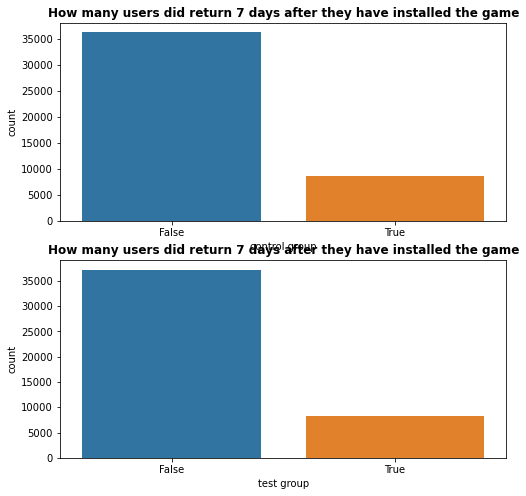

In [13]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
axt=df[(df.version=='control')]['retention_7']
sns.countplot(axt)
plt.title('How many users did return 7 days after they have installed the game', size=12, fontweight='bold')
plt.xlabel('control group')

plt.subplot(2,1,2)
axc=df[(df.version=='test')]['retention_7']
sns.countplot(axc)
plt.title('How many users did return 7 days after they have installed the game', size=12, fontweight='bold')
plt.xlabel('test group')

In [14]:
df.groupby(['retention_7', 'version'])['sum_gamerounds'].count().reset_index()

,retention_7,version,sum_gamerounds
0,False,control,36198
1,False,test,37210
2,True,control,8502
3,True,test,8279


Again, we see a relatively familar picture, when we compare both groups.

# A/B Testing
## A/B Testing on the overall level

Before we can do the actaul A/B test, which is an indepdent t-test, we have to check following assumptions

- Equal variance

- normal distribution

### Equal variance

In [15]:
control=df[df['version']=='control']['sum_gamerounds']
test=df[df['version']=='test']['sum_gamerounds']

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

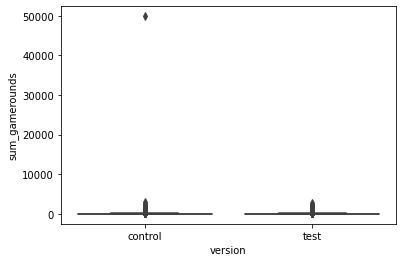

In [16]:
ax=df[['version', 'sum_gamerounds']]
sns.boxplot(data=ax, x='version', y='sum_gamerounds')

As we can see, we have a massive outlier in the control group. To get a representative outcome, we need to ged rid of the outlier.

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

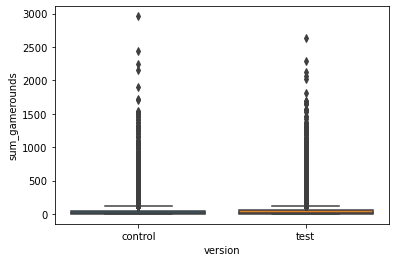

In [17]:
df=df[df['sum_gamerounds']<49854]
control=df[df['version']=='control']['sum_gamerounds']
test=df[df['version']=='test']['sum_gamerounds']
ax1=df[['version', 'sum_gamerounds']]
sns.boxplot(data=ax1, x='version', y='sum_gamerounds')

In [18]:
df.groupby('version')['sum_gamerounds'].agg({'count', 'mean', 'std'})

,count,std,mean
version,,,
control,44699,102.057598,51.342111
test,45489,103.294416,51.298776


In [19]:
#Leven Test
import scipy.stats as stats
print(stats.levene(control, test, center='mean'))
print(stats.levene(control, test, center='median'))

LeveneResult(statistic=0.44323828641133145, pvalue=0.5055653021251583)
LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)


We can move on by assuming equal variance.

### Normal Distribution

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

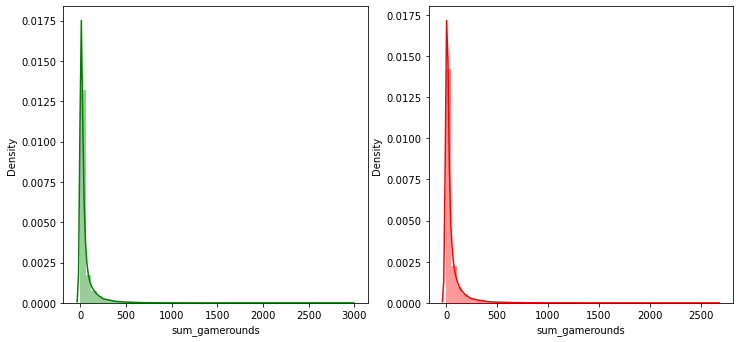

In [20]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(control, kde=True, color='green')

plt.subplot(2,2,2)
sns.distplot(test, kde=True, color='red')

Text(0.5, 1.0, 'QQ-Plot Test')

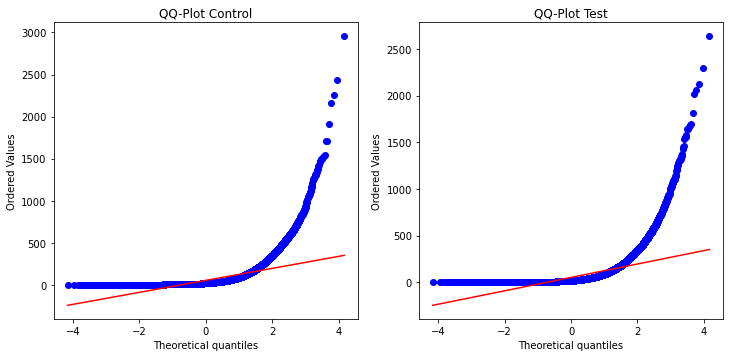

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
stats.probplot(control, dist='norm', plot=plt)
plt.title('QQ-Plot Control')

plt.subplot(2,2,2)
stats.probplot(test, dist='norm', plot=plt)
plt.title('QQ-Plot Test')

In [22]:
print(control.skew())
print(test.skew())

5.940397152744336
5.967287898713902


Looking at the histograms and Q-Q plot, we can see that the normality assumption is violated. Another indicator is the skewness score, which indicates that the distribution is right-skewed. But we will perform a Kolmogorov-Smirnov test to make sure.

In [23]:
from scipy.stats import kstest
kc, pc=kstest(control, 'norm', stats.norm.fit(control))
kt, pt=kstest(test, 'norm', stats.norm.fit(test))
print('{:.40f}'.format(pc))
print('{:.40f}'.format(pt))

0.0000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000


The visualizations, the skewness score and the Kolmogorov-Smirnov test indicate that the assumption of normality is violated.

### Running the test

In the previous chapter, we stated that we have equal variance but not a normal distribution. Therefore we will not be able to do an independent t-test and will be required to do a Mann-Whitney test.

First, we need to state our null and alternative hypotheses:

- H0=> There is no statistically significant difference between the two means

- H1=> There is a statistically significant difference between the two means

In [24]:
from scipy.stats import mannwhitneyu
u, p=mannwhitneyu(control, test)
print(p)

0.05089155279145376


The outcome of the Mann-Whitney test indicates that there is no statistically significant difference between the test and the control group. So we do not reject the null hypothesis. There is no statistically significant difference between the two means.

But we also want to understand whether moving the gate from level 30 to 40 changed the behaviour, as in actually playing or opening the app.

Therefore we will look if there is a difference between the control and test group in
- using the app the day after they have installed the game
- using the app seven days after they have installed the game

## A/B Testing one day after the installation of the game
### Checking assumptions

To determine if users have changed their behaviour after the gate was moved from level 30 to level 40, we have to use a hypothesis test, in which we compare the proportions of the two independent samples/groups (t-test).

In [25]:
#Control group retention1
con1=df[df['version']=='control']['retention_1'].value_counts().to_frame()
con1['per_ret']=con1.retention_1/con1.retention_1.sum()
con1

,retention_1,per_ret
False,24665,0.551802
True,20034,0.448198


In [26]:
#Test group retention1
test1=df[df['version']=='test']['retention_1'].value_counts().to_frame()
test1['per_ret']=test1.retention_1/test1.retention_1.sum()
test1

,retention_1,per_ret
False,25370,0.557717
True,20119,0.442283


As we can see, we fulfil the 2x2 aspect where we have at least five yes and no responses.

The sample size is big enough to assume a normal distribution.

By checking all boxes, we can run a t-test. Before doing so, we have to set up the null and alternative hypotheses:

- H0=> Equal proportion between the control and test group

- H1=> There is a statistically significant difference in the proportion between the control and test group

In [27]:
con1=df[df['version']=='control']['retention_1']
test1=df[df['version']=='test']['retention_1']
stats.ttest_ind(con1, test1)

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182521)

We can see the same picture as when we compared the sum of the game rounds. We do not reject the null hypothesis. We do not have a statistically significant difference in proportion between the two groups.

Next, we want to analyse if there is a difference in the behaviour with retention_7.

## A/B Testing seven days after the installation of the game
### Checking assumptions

Just like we did analysing "retention_1", we will do a t-test to compare the proportions of the two independent samples/groups.

In [28]:
#Control group retention 7
con7=df[df['version']=='control']['retention_7'].value_counts().to_frame()
con7['per_ret']=con7.retention_7/con7.retention_7.sum()
con7

,retention_7,per_ret
False,36198,0.809817
True,8501,0.190183


In [29]:
#Test group retention 7
test7=df[df['version']=='test']['retention_7'].value_counts().to_frame()
test7['per_ret']=test7.retention_7/test7.retention_7.sum()
test7

,retention_7,per_ret
False,37210,0.818
True,8279,0.182


As we can see, we fulfil the 2x2 aspect where we have at least five yes and no responses.

The sample size is big enough to assume a normal distribution.

By checking all boxes, we can run to run a t-test. Before doing so, we have to set up the null and alternative hypotheses:

- H0=> Equal proportion between the control and test group

- H1=> There is a statistically significant difference in the proportion between the control and test group

In [30]:
#control group retention 7
con7=df[df['version']=='control']['retention_7']
#test group retention 7
test7=df[df['version']=='test']['retention_7']
stats.ttest_ind(con7, test7)

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.0015915357297854773)

So we can reject the null hypothesis. The test has shown a statistically significant difference between these two groups.

Next, we will check if the proportion of the control group is statistically greater or less than the proportion of the test group.

In [31]:
stats.ttest_ind(con7, test7, alternative='greater')

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.0007957678648927387)

In [32]:
stats.ttest_ind(con7, test7, alternative='less')

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.9992042321351072)

Here we can see that the proportion of the control group is more significant than the proportion of the test group.
What does that mean? The test indicates that users from the control group are likelier to play the game after seven days of installing it.

# Conclusion

The analysis has shown us that the change from level 30 to 40 did not significantly impact the rounds played by the users. It did not even impact the behaviour of the users one day after they had installed the game.

But, regarding the user behaviour "seven days after the installation," we have observed that the control group is likelier to play the game seven days after the observation than the test group.

This can and should be further analyzed in future exploratory studies, in which we could get more user feedback.